In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [27]:
now = datetime.now()
current_time = now.strftime("%Ho%Mo%S")
print("Current Time =", current_time+".jpg")

Current Time = 12o14o51.jpg


In [23]:
today = datetime.now()
print(today)

2021-05-17 12:11:34.811932


In [ ]:
datetime.datetime(2020, 5, 17)

In [11]:
datetime.datetime.now()

datetime.datetime(2021, 5, 17, 12, 6, 49, 290335)

In [12]:
print(x.year)

2020


In [9]:
def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img


In [10]:
imgSize= '/home/facit/Desktop/peter-broomfield-m3m-lnR90uM-unsplash.jpg'

v_img = cv2.imread(imgSize) # vertical image
scaled_v_img = resizeAndPad(v_img, (320,240), 127)

In [15]:
h_img = cv2.imread(imgSize) # horizontal image
scaled_h_img = resizeAndPad(h_img, (320,240), 127)

In [16]:
sq_img = cv2.imread(imgSize) # square image
scaled_sq_img = resizeAndPad(sq_img, (320,240), 127)

In [22]:
# plt.imshow(scaled_h_img)
cv2.imwrite("scaled_h_img.jpg",scaled_h_img)

True

In [25]:
# plt.imshow(scaled_h_img)
cv2.imwrite("scaled_sq_img.jpg",scaled_v_img)

True

In [24]:
cv2.imwrite("scaled_v_img.jpg",scaled_v_img)

True

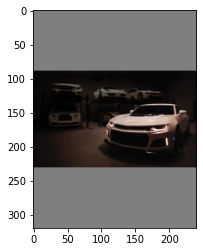

In [19]:
plt.imshow(scaled_v_img)

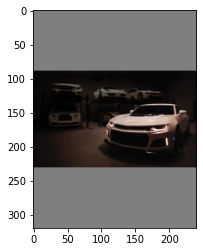

In [20]:
plt.imshow(scaled_v_img)